In [1]:
!pip install tensorflow keras numpy
!pip install --upgrade keras numpy matplotlib

  Using cached numpy-2.1.3-cp312-cp312-macosx_14_0_arm64.whl.metadata (62 kB)
Using cached numpy-2.1.3-cp312-cp312-macosx_14_0_arm64.whl (5.1 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.2
    Uninstalling numpy-2.3.2:
      Successfully uninstalled numpy-2.3.2
  Using cached numpy-2.3.2-cp312-cp312-macosx_14_0_arm64.whl.metadata (62 kB)
Using cached numpy-2.3.2-cp312-cp312-macosx_14_0_arm64.whl (5.1 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.1.3
    Uninstalling numpy-2.1.3:
      Successfully uninstalled numpy-2.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 2.3.2 which is incompatible.


In [2]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import copy

In [3]:
# Load MNIST dataset 
keras.datasets.mnist.load_data(path="mnist.npz")
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
# Format (label, np.2darray)
trainList = list(zip(y_train, x_train / 255))
testList = list(zip(y_test, x_test / 255))

#OneHot Encoding to make all values 1 or 0
def labelOneHotEncoder(label):
  encoding = np.zeros((10))
  encoding[label] = 1
  return encoding

def encodeAllLabels(labelSet):
  for i in range(len(labelSet)):
    labelSet[i] = (labelOneHotEncoder(labelSet[i][0]), labelSet[i][1].flatten())

encodeAllLabels(trainList)
encodeAllLabels(testList)

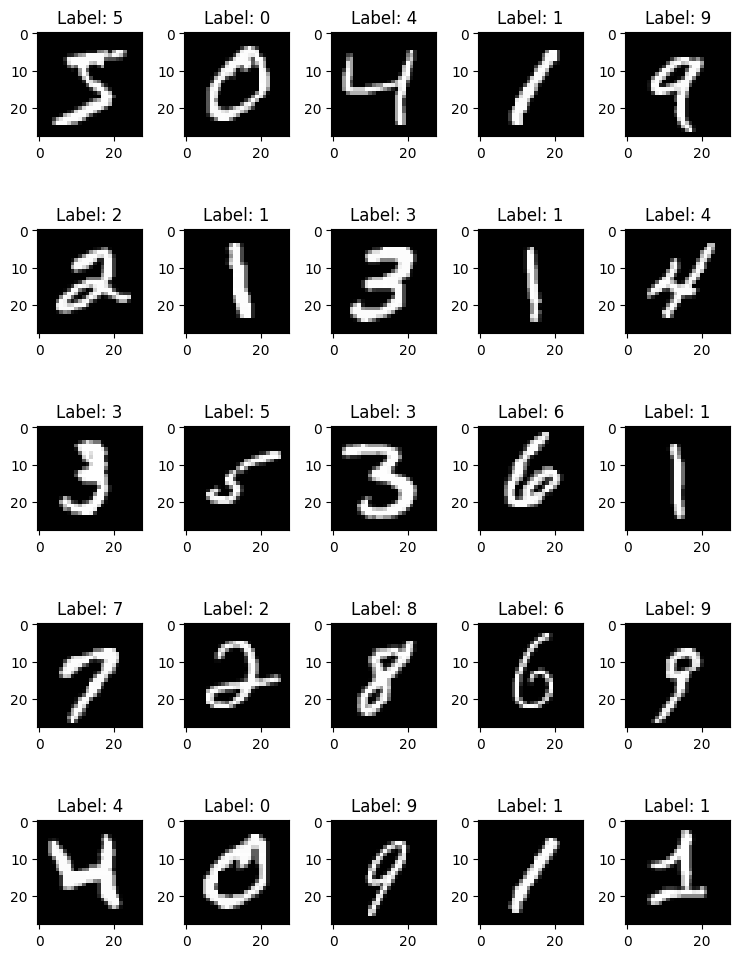

In [5]:
num = 25
images = x_train[:num]
labels = y_train[:num]
num_row = 5
num_col = 5

# plot images 
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(trainList[i][1].reshape(28,28), cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

In [6]:
# Initializing
modelDict = {}
for i in range(10):
  modelDict[i] = np.random.normal(0, 0.01, (784))

LEARNING_RATE = 0.5

In [7]:
#Compute gradient for cross-entropy loss 
def gradient(row, label, input, output):
  return (output[row] - label[row]) * input

#Softmax function, convert raw scores into probabilites and - max input to avoid overflow
def softmaxDenominator(input):
  return np.sum(np.exp(input - np.max(input)))

def softmax(input):
  denom = softmaxDenominator(input)
  softmaxOutput = np.array([np.exp(i - np.max(input)) / denom for i in input])
  return softmaxOutput

def crossEntropyLoss(label, output):
  classIndex = np.where(label == 1)
  return -1 * np.log(output[classIndex])

def model(input, params):
  preSoftmaxOutputs = []
  for i in range(10):
    preSoftmaxOutputs.append(np.dot(params[i], input))

  output = softmax(np.array(preSoftmaxOutputs))
  return output

In [8]:
def getTestAcc(params, testingList):
  totalWrongs = 0
  for label, input in testingList:
    output = model(input, params)
    if(np.argmax(output) != np.where(label == 1)):
      totalWrongs += 1
  return 1 - (totalWrongs / len(testingList))

In [9]:
def train(trainData, params, learningRate, epochs):
  training_data = []
  testing_data = []
  index = 0
  for i in range(epochs):
    epoch_loss = 0
    for label, input in trainData:
      index = index + 1
      output = model(input, params)
      for j in range(10):
        tempGradient = gradient(j, label, input, output)
        params[j] -= learningRate * tempGradient / (i + 1)

      loss = crossEntropyLoss(label, output)
      epoch_loss += loss

    training_data.append((i + 1, epoch_loss/len(trainData)))
    testing_data.append((i + 1, getTestAcc(modelDict, testList)))
    print("Epoch:", i + 1, "Loss:", epoch_loss/len(trainData))

    random.shuffle(trainData)
  return (training_data, testing_data)

In [10]:
trainingData, testingData = train(trainList, modelDict, LEARNING_RATE, 80)

Epoch: 1 Loss: [4.79074202]
Epoch: 2 Loss: [2.93816065]
Epoch: 3 Loss: [1.93728287]
Epoch: 4 Loss: [1.43823012]
Epoch: 5 Loss: [1.15771587]
Epoch: 6 Loss: [0.9790723]
Epoch: 7 Loss: [0.84447835]
Epoch: 8 Loss: [0.75112332]
Epoch: 9 Loss: [0.67585942]
Epoch: 10 Loss: [0.61731646]
Epoch: 11 Loss: [0.56726474]
Epoch: 12 Loss: [0.53426927]
Epoch: 13 Loss: [0.50371233]
Epoch: 14 Loss: [0.47745841]
Epoch: 15 Loss: [0.45202047]
Epoch: 16 Loss: [0.43703757]
Epoch: 17 Loss: [0.41977638]
Epoch: 18 Loss: [0.40311354]
Epoch: 19 Loss: [0.38922055]
Epoch: 20 Loss: [0.37917822]
Epoch: 21 Loss: [0.36922822]
Epoch: 22 Loss: [0.36109134]
Epoch: 23 Loss: [0.35175054]
Epoch: 24 Loss: [0.34455004]
Epoch: 25 Loss: [0.33846528]
Epoch: 26 Loss: [0.33170448]
Epoch: 27 Loss: [0.32567126]
Epoch: 28 Loss: [0.32107267]
Epoch: 29 Loss: [0.31756747]
Epoch: 30 Loss: [0.31178832]
Epoch: 31 Loss: [0.30873906]
Epoch: 32 Loss: [0.30607051]
Epoch: 33 Loss: [0.30215987]
Epoch: 34 Loss: [0.29885285]
Epoch: 35 Loss: [0.29465

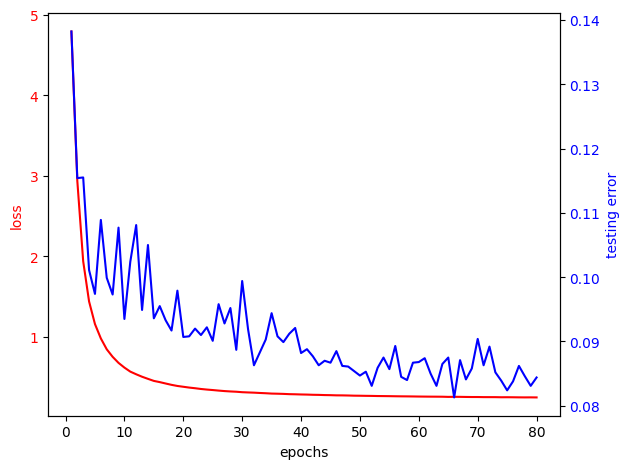

In [11]:
xRange = [data[0] for data in trainingData]
yValsTrain = [data[1] for data in trainingData]
yValsTest = [1 - data[1] for data in testingData]

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss', color="red")
ax1.plot(xRange, yValsTrain, color="red")
ax1.tick_params(axis='y', labelcolor="red")
ax2 = ax1.twinx()
ax2.set_ylabel('testing error', color="blue")
ax2.plot(xRange, yValsTest, color="blue")
ax2.tick_params(axis='y', labelcolor="blue")

fig.tight_layout()
plt.show()

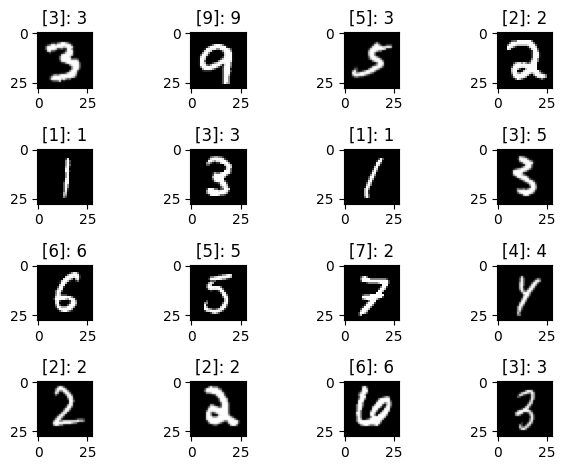

In [12]:
rows = 4
cols = 4

examples = []
labels = []
for i in range(rows * cols):
  labels.append("[" + str(np.argmax(testList[500 + i][0])) + "]: ")
  examples.append(testList[500 + i][1])

for i in range(rows * cols):
  labels[i] += str(np.argmax(model(examples[i], modelDict)))


figure, ax = plt.subplots(rows,cols)
for idx, img in enumerate(examples):
  ax.ravel()[idx].imshow(np.reshape(img, (28,28)), cmap=plt.get_cmap('gray'))
  ax.ravel()[idx].set_title(labels[idx])


plt.tight_layout()
plt.show()